In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split

# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

In [2]:
PATH = os.getcwd()
train_path = os.path.join(PATH, 'zt_train.csv')

test_path = os.path.join(PATH, 'zt_test.csv')

df_train = pd.read_csv(train_path)

df_test = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train.shape}')

print(f'df_test DataFrame shape: {df_test.shape}')

df_train DataFrame shape: (204, 6)
df_test DataFrame shape: (25, 6)


In [3]:
#Import the package and the generate_features function
from cbfv.composition import generate_features

In [4]:
print('DataFrame column names before renaming:')
print(df_train.columns)

print(df_test.columns)

rename_dict = {'zt': 'target'}
df_train = df_train.rename(columns=rename_dict)

df_test = df_test.rename(columns=rename_dict)

df_train = df_train.rename(columns=rename_dict)

df_test = df_test.rename(columns=rename_dict)

print('\nDataFrame column names after renaming:')
print(df_train.columns)

print(df_test.columns)

DataFrame column names before renaming:
Index(['formula', 'Temperature', 'zt', 'k', 'c', 's'], dtype='object')
Index(['formula', 'Temperature', 'zt', 'k', 'c', 's'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'Temperature', 'target', 'k', 'c', 's'], dtype='object')
Index(['formula', 'Temperature', 'target', 'k', 'c', 's'], dtype='object')


In [5]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

Assigning Features...: 100%|██████████| 25/25 [00:00<00:00, 7116.23it/s]

	Featurizing Compositions...
	Creating Pandas Objects...
	Featurizing Compositions...
	Creating Pandas Objects...


In [6]:
X_train_unscaled.head()

,sum_Number,sum_MendeleevNumber,sum_AtomicWeight,sum_MeltingT,sum_Column,sum_Row,sum_CovalentRadius,sum_Electronegativity,sum_NsValence,sum_NpValence,...,range_NValence,range_NsUnfilled,range_NpUnfilled,range_NdUnfilled,range_NfUnfilled,range_NUnfilled,range_GSvolume_pa,range_GSbandgap,range_GSmagmom,range_SpaceGroupNumber
0,154.00,326.00,367.485800,2450.9700,58.00,16.00,466.00,9.9100,7.0,11.00,...,73.25,0.1875,1.1875,0.0,0.0,0.50,100.241705,0.119700,0.0,8454.1875
1,153.34,325.88,365.680392,2450.1836,57.98,15.98,465.82,9.9088,7.0,10.98,...,58.96,0.1600,1.7600,0.0,0.0,1.04,109.456054,0.102144,0.0,7669.3600
2,152.68,325.76,363.874984,2449.3972,57.96,15.96,465.64,9.9076,7.0,10.96,...,58.96,0.1600,1.7600,0.0,0.0,1.04,109.456054,0.102144,0.0,7669.3600
3,152.02,325.64,362.069576,2448.6108,57.94,15.94,465.46,9.9064,7.0,10.94,...,58.96,0.1600,1.7600,0.0,0.0,1.04,109.456054,0.102144,0.0,7669.3600
4,151.36,325.52,360.264168,2447.8244,57.92,15.92,465.28,9.9052,7.0,10.92,...,58.96,0.1600,1.7600,0.0,0.0,1.04,109.456054,0.102144,0.0,7669.3600


In [7]:
X_train_unscaled.shape

(204, 88)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)

X_test = scaler.transform(X_test_unscaled)

In [10]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [11]:
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [12]:
print(df_train.columns)
print(df_test.columns)

Index(['formula', 'Temperature', 'target', 'k', 'c', 's'], dtype='object')
Index(['formula', 'Temperature', 'target', 'k', 'c', 's'], dtype='object')


In [13]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
       }
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [14]:

df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    ])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train


In [15]:
# Build a dictionary of model names
from collections import OrderedDict
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,

    'knr': KNeighborsRegressor,
})


In [16]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor
Now fitting and evaluating model etr: ExtraTreesRegressor
Now fitting and evaluating model knr: KNeighborsRegressor
Finished fitting 7 models, total time: 1.17 s


In [17]:
# Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_train', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000374,0.000000,0.185887,0.230912
1,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.008351,0.483599,0.134886,0.165936
2,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.034465,0.608267,0.111652,0.144525
3,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.000770,0.636597,0.106745,0.139201
4,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.478431,0.806543,0.069126,0.101564
5,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",0.291592,0.823416,0.061704,0.097034
6,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",0.300958,0.838011,0.044509,0.092937


In [18]:
classic_models


OrderedDict([('dumr',
              DummyRegressor(constant=None, quantile=None, strategy='mean')),
             ('rr',
              Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto', tol=0.001)),
             ('abr',
              AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                                n_estimators=50, random_state=None)),
             ('gbr',
              GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                                        init=None, learning_rate=0.1, loss='ls', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0, min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0, n_estimat

In [19]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

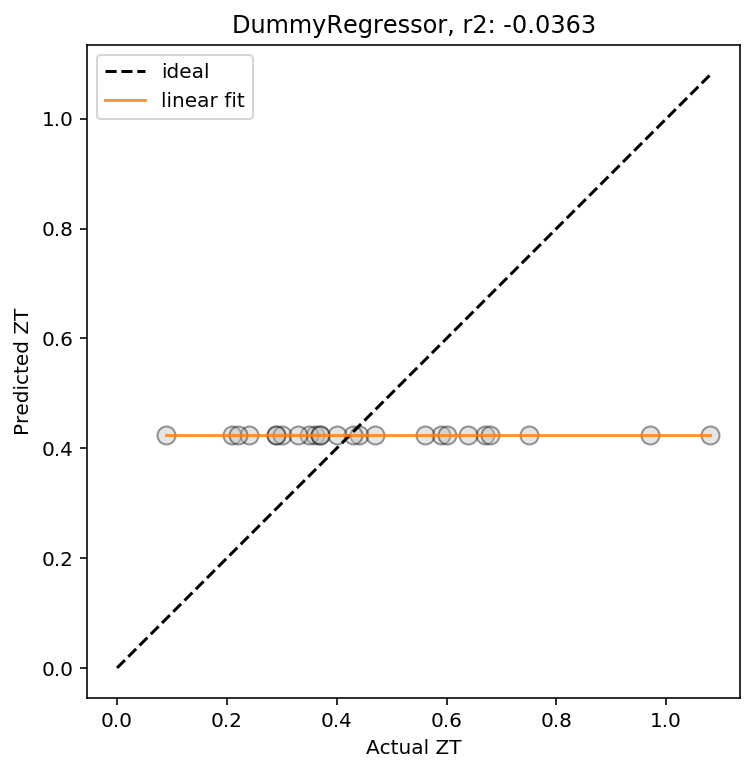

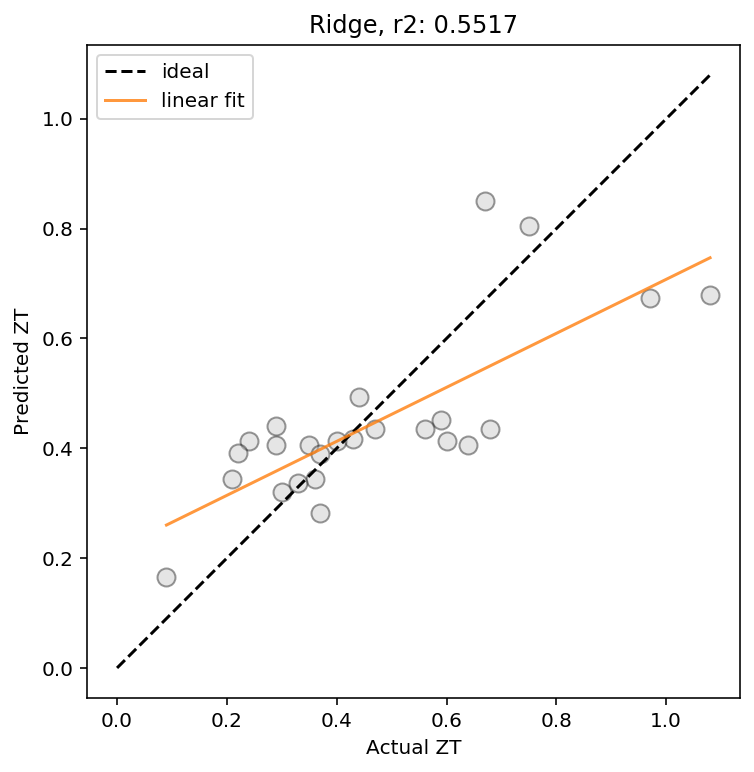

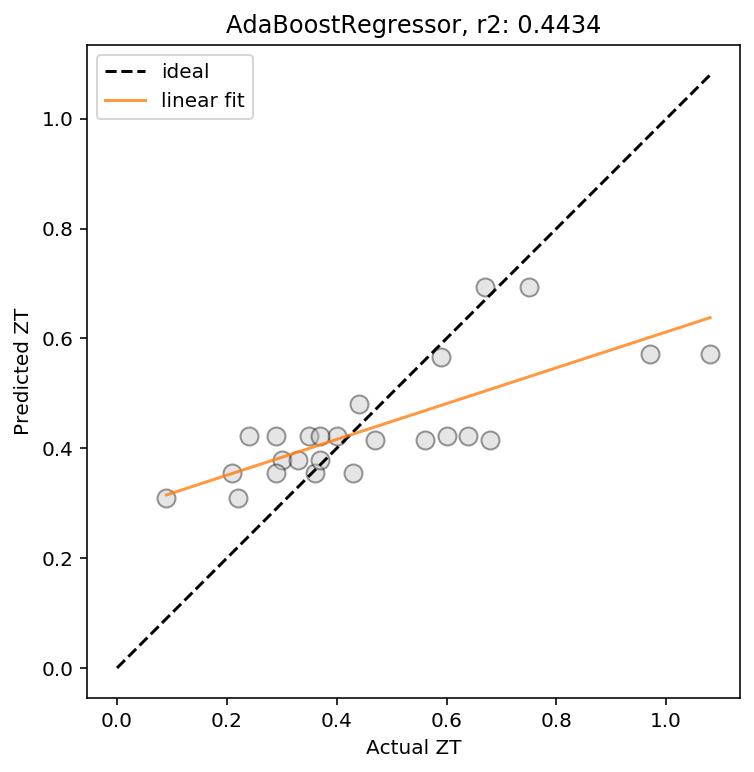

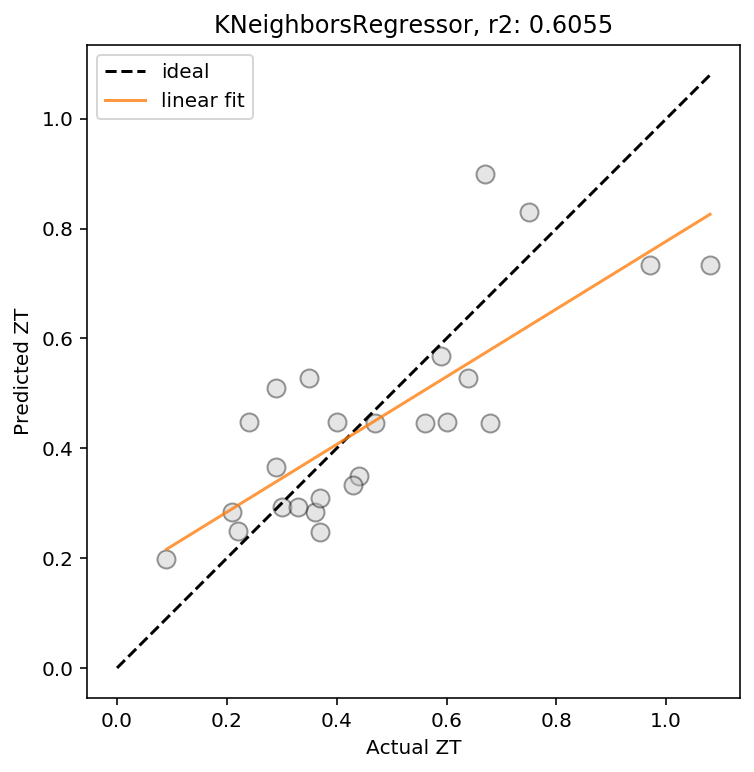

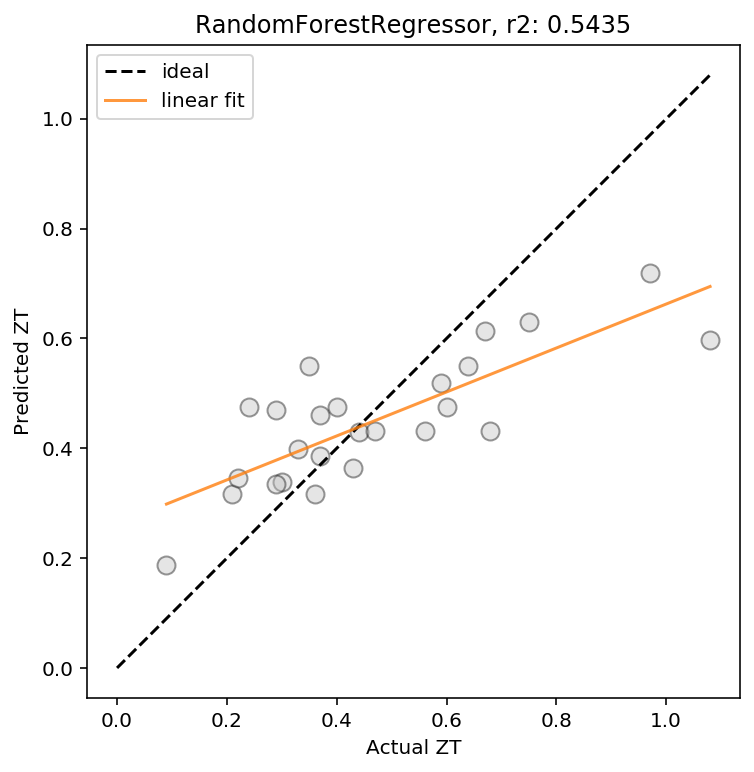

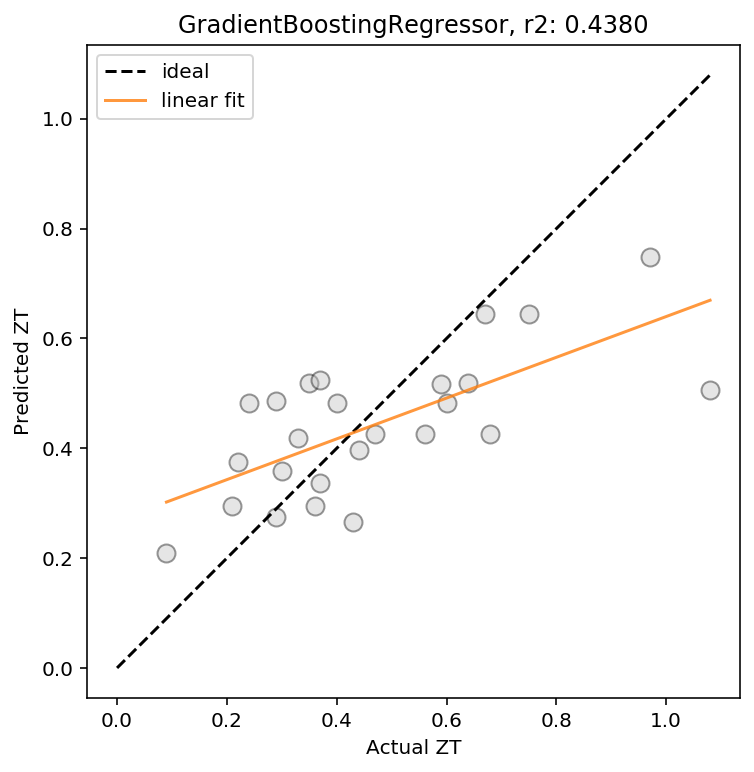

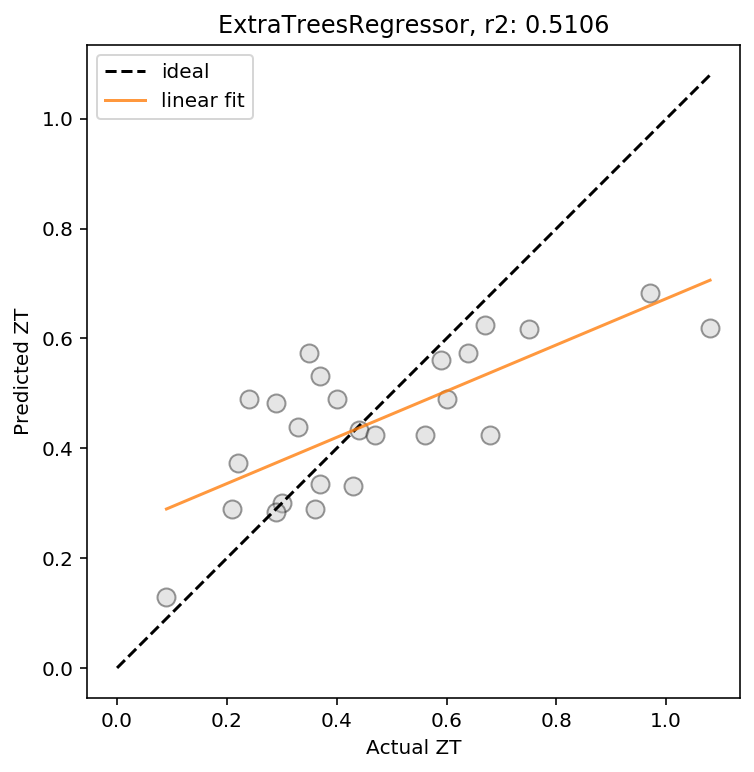

In [20]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_test = y_test
    y_pred_test = model.predict(X_test)

    plot = plot_pred_act(y_act_test, y_pred_test, model, reg_line=True, label='ZT')

In [21]:
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.model_selection import cross_val_score as crovasco
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [22]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

In [23]:
from sklearn.ensemble import RandomForestClassifier as Rafo
from sklearn.ensemble import RandomForestRegressor as RaFr
np.random.seed(0)
rafo = RaFr(100)
rafo.fit(X_train_unscaled,y_train_encoded)
print(rafo.feature_importances_)

[5.02935115e-03 5.68675202e-03 5.46334202e-03 2.04551557e-02
 3.57307710e-03 4.23773930e-03 1.43897504e-02 9.88937641e-03
 2.13425489e-03 1.81008886e-03 1.79998893e-03 1.16246903e-02
 2.54006234e-03 3.41679533e-03 4.49009439e-03 1.25208333e-04
 1.03018932e-03 6.02131491e-03 1.23120233e-02 2.08187936e-03
 6.75463168e-04 1.17795404e-02 7.77526686e-03 4.54708265e-03
 7.30624058e-03 1.53772168e-02 2.85976746e-03 7.77203179e-03
 1.18844356e-02 2.43247820e-02 1.05222757e-03 3.04259140e-03
 4.48360931e-03 1.88883503e-02 3.87724453e-03 3.43250358e-03
 6.97789927e-03 2.27332330e-04 2.22327245e-04 1.07051810e-02
 1.56589397e-02 2.86403313e-03 3.83927529e-04 8.27653736e-03
 2.38629101e-04 7.02921812e-03 6.26895217e-06 8.28236457e-03
 4.95410219e-04 0.00000000e+00 2.03842733e-03 3.47514440e-03
 5.46496469e-05 1.11520693e-02 0.00000000e+00 0.00000000e+00
 4.58926139e-04 2.77749243e-07 1.51558601e-02 5.82938037e-04
 9.22997118e-07 1.59087441e-03 6.54322441e-04 2.70160062e-03
 1.93335712e-04 4.293199

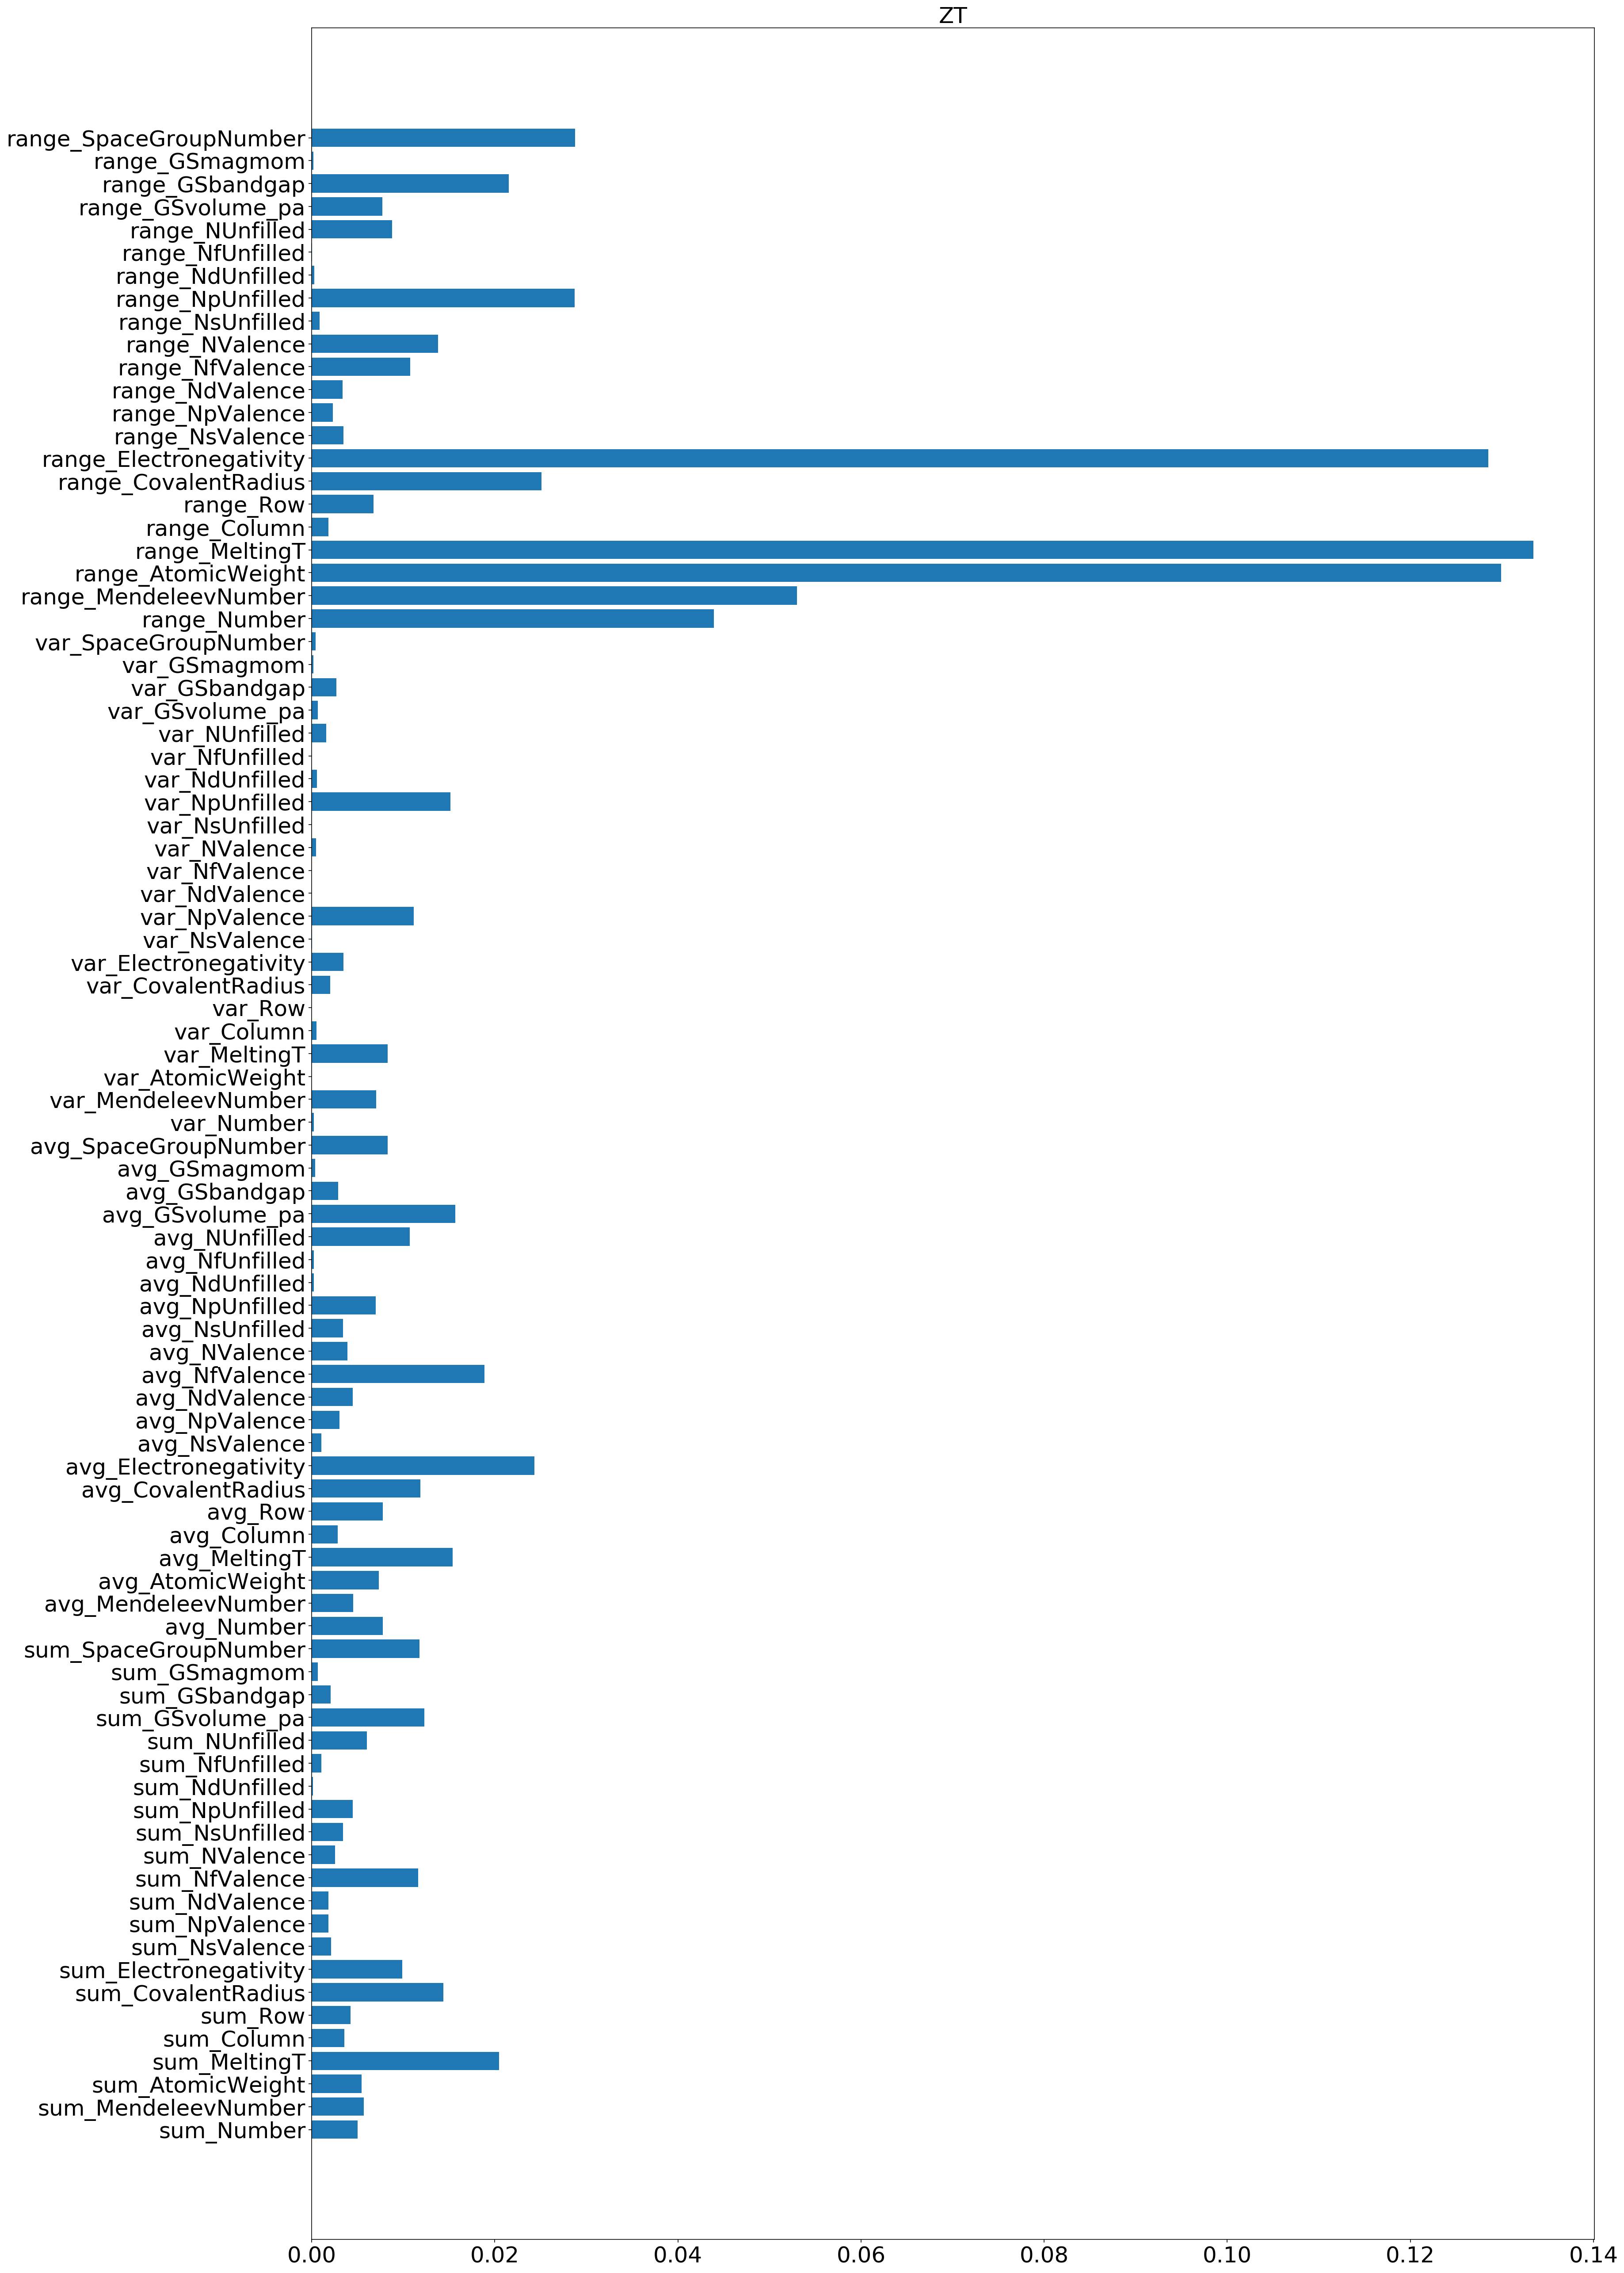

In [24]:
plt.figure(figsize=[26,46])
plt.axes()
plt.barh(np.arange(88),rafo.feature_importances_, )
plt.yticks(np.arange(88),X_train_unscaled.columns, fontsize=25 )
plt.xticks(fontsize=25 )
plt.title('ZT',fontsize=25)
plt.show()